# Anemómetro - Ondeando Banderas

## 0. Cargar librerías

In [43]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## 1. Cargar audios

In [44]:
# Creamos las listas que contienen los archivos de audio

fan_audios = ['v1 - fan.wav', 'v2 - fan.wav', 'v3 - fan.wav', 'v4 - fan.wav', 'v5 - fan.wav', 'v6 - fan.wav', 'v7 - fan.wav',
             'v8 - fan.wav', 'v9 - fan.wav']
a_up_audios = ['v1 - a up.wav', 'v2 - a up.wav', 'v3 - a up.wav', 'v4 - a up.wav', 'v5 - a up.wav', 'v6 - a up.wav', 'v7 - a up.wav',
             'v8 - a up.wav', 'v9 - a up.wav']
a_down_audios = ['v1 - a down.wav', 'v2 - a down.wav', 'v3 - a down.wav', 'v4 - a down.wav', 'v5 - a down.wav', 'v6 - a down.wav', 'v7 - a down.wav',
        'v8 - a down.wav', 'v9 - a down.wav']
b_up_audios = ['v1 -  b up.wav', 'v2 - b up.wav', 'v3 - b up.wav', 'v4 - b up.wav', 'v5 - b up.wav', 'v6 - b up.wav', 'v7 - b up.wav',
    'v8 - b up.wav', 'v9 - b up.wav']
b_down_audios = ['v1 - b down.wav', 'v2 - b down.wav', 'v3 - b down.wav', 'v4 - b down.wav', 'v5 - b down.wav', 'v6 - b down.wav', 'v7 - b down.wav',
        'v8 - b down.wav', 'v9 - b down.wav']

In [45]:
# Corte (en segundos) en los que se tomarán las muestras de 5 seg
inicios = [2,7,12,17,22,27]

In [46]:
# Función para cargar los audios
dir = '../Montaje_experimental/Audios' #Direccion con los datos 
def cargar_audios(audio_files, start_times):
    audio_list = []
    audio_sr_list = []

    for audio_file in audio_files:
        for start_time in start_times:
            audio, ar = cargar(f'dir/{audio_file}', start_time)
            audio_list.append(audio)
            audio_sr_list.append(ar)

    return audio_list, audio_sr_list

In [47]:
# Cargar todos los audios
fan, fan_sr = cargar_audios(fan_audios, inicios)
a_up, a_up_sr = cargar_audios(a_up_audios, inicios)
a_down, a_down_sr = cargar_audios(a_down_audios, inicios)
b_up, b_up_sr = cargar_audios(b_up_audios, inicios)
b_down, b_down_sr = cargar_audios(b_down_audios, inicios)

## 2. Resta de audios (eliminación de ruido)

In [49]:
#Función  para la resta
def calcular_final(ventilador, lista):
    return [total - fan for total, fan in zip(lista, ventilador)]

a_up_final = calcular_final(fan, a_up)
a_down_final = calcular_final(fan, a_down)
b_up_final = calcular_final(fan, b_up)
b_down_final = calcular_final(fan, b_down)

### 2.1 Gráficas

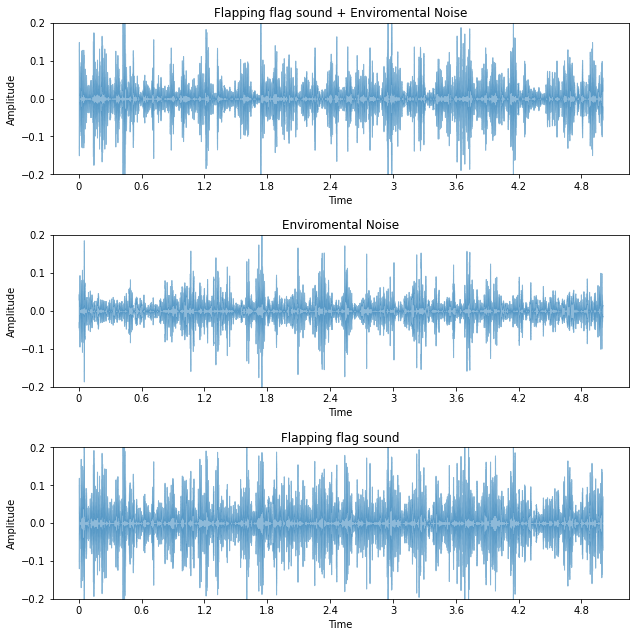

In [51]:
plt.figure(figsize=(10, 10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(3, 1, 1)
librosa.display.waveshow(b_up[40], alpha=0.5)
plt.ylabel('Amplitude')
plt.ylim((-0.2, 0.2))
plt.title("Flapping flag sound + Enviromental Noise")

plt.subplot(3, 1, 2)
librosa.display.waveshow(fan[40], alpha=0.5)
plt.ylim((-0.2, 0.2))
plt.ylabel('Amplitude')
plt.title('Enviromental Noise')

plt.subplot(3, 1, 3)
librosa.display.waveshow(b_up_final[40], alpha=0.5)
plt.ylim((-0.2, 0.2))
plt.ylabel('Amplitude')
plt.title('Flapping flag sound')

plt.show()